In [6]:
#Credit to https://github.com/BYUCamachoLab/ottoeplitz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import ottoeplitz
from scipy.stats import chi2, binom


""" 
Toeplitz Hashing Example
======================

In this example, we generate a large Gaussian input data set. We plot the data before
and after hashing. The data after hashing should be uniform.

"""



' \nToeplitz Hashing Example\n======================\n\nIn this example, we generate a large Gaussian input data set. We plot the data before\nand after hashing. The data after hashing should be uniform.\n\n'

In [7]:
def read_file_in_chunks(filename, N):
    with open(filename, 'r') as file:
        data = file.read().strip()  # Read the entire file into a single string and remove any trailing spaces or newlines
    return [int(data[i:i+N], 2) for i in range(0, len(data), N)]  # Split the string into chunks of size N

def read_full_file_as_str(filename):
    with open(filename, 'r') as file:
        return file.read().strip()

# Function to calculate Shannon entropy
def shannon_entropy(bitstring):
    # Convert bitstring to a numpy array of integers
    bits = np.array([int(bit) for bit in bitstring])
    
    # Calculate the frequency of 0's and 1's
    counts = np.bincount(bits)
    probabilities = counts / len(bits)
    
    # Filter out zero probabilities to avoid log2(0)
    probabilities = probabilities[probabilities > 0]
    
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy

def chi_squared_test(bits):
        counts = np.bincount(list(bits), minlength=2)
        observed = counts
        expected = np.array([len(bits)/2, len(bits)/2])
        chi_sq = np.sum((observed - expected) ** 2 / expected)
        # Degrees of freedom = number of categories - 1 = 1
        p_value = 1 - chi2.cdf(chi_sq, df=1)
        return chi_sq, p_value

def plot_data(data, n):
        """ Bins up data and plots. """
        N, data = ottoeplitz.Toeplitz._calculate_N(data)
        binned_data, bins = np.histogram(data, bins=2**n)
        data_digital = np.digitize(data, bins, right=True)
        fig, ax = plt.subplots()
        ax.hist(data_digital,bins=2**n, label='Digitized Raw Data')
        plt.xlabel('Random numbers')
        plt.ylabel('Frequency')
        plt.title("Plotting Data Before and After Hashing")
        plt.show()
        return binned_data, data_digital
    
def int_to_binary_string(n, length):
    n = int(n)
    return f"{n:0{length}b}"
    
def data_to_bitstring(data, N):
    strings = [int_to_binary_string(num, N) for num in data]
    return ''.join(strings)
    
def toefflize(full_bitstring, inputdata, N):
    t = ottoeplitz.Toeplitz(inputdata, N)
    plot_data(inputdata, N)
    print("Entropy: ", shannon_entropy(full_bitstring))
    print("Chi-squared", chi_squared_test(full_bitstring))
    
    processed_data = t.hash()
    plot_data(processed_data, N)
    processed_bitstring = data_to_bitstring(processed_data, N)
    print("Entropy: ", shannon_entropy(processed_bitstring))
    print("Chi-squared", chi_squared_test(processed_bitstring))


    

Reading data from RNG1-2.txt


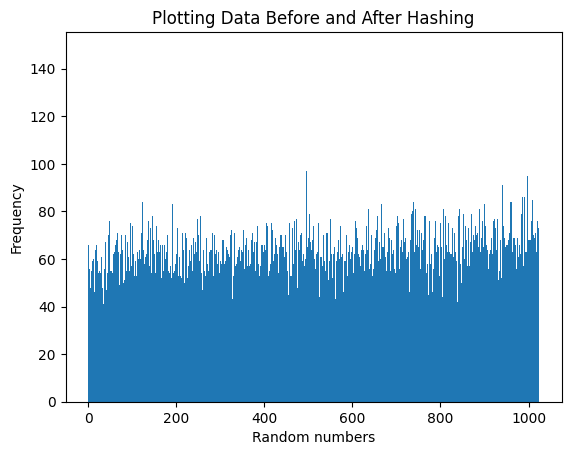

Entropy:  0.9999573973551346
Chi-squared (70.87107, 0.0)
outlen 819
outlen 819


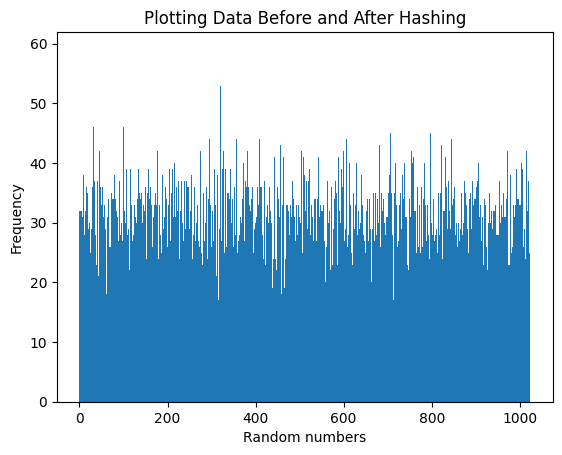

Entropy:  0.999999989245834
Chi-squared (0.007814407814407814, 0.9295594454240803)
Reading data from RNG2-2.txt


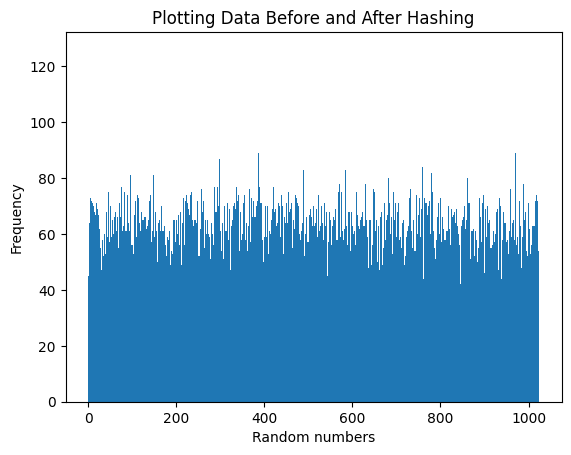

Entropy:  0.9999999910051971
Chi-squared (0.014963333333333334, 0.902641867546368)
outlen 846
outlen 846


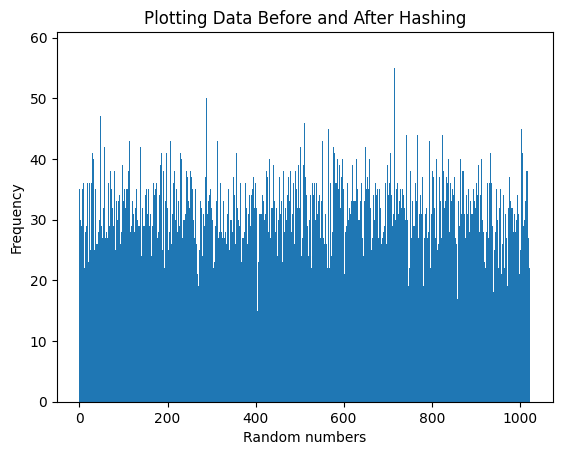

Entropy:  0.9999983935517048
Chi-squared (1.205791962174941, 0.27216711719176667)


In [8]:
N = 10
for file in ["RNG1-2.txt", "RNG2-2.txt"]:
    print(f"Reading data from {file}")
    dataset = np.array(read_file_in_chunks(file, N))
    full_bitstring = read_full_file_as_str(file)
    toefflize(full_bitstring, dataset, N)
